# Semestral
## Física computacional
### Fecha de entrega: 15/06/2022

# Tunelaje Cuántico 

In [1]:
from IPython.core.display import display, HTML

## Introducción

En mecánica cuántica, el efecto túnel es un fenómeno cuántico por el que una partícula viola los principios de la mecánica clásica penetrando una barrera de potencial o impedancia mayor que la energía cinética de la propia partícula. Una barrera, en términos cuánticos aplicados al efecto túnel, se trata de una cualidad del estado energético de la materia análogo a una "colina" o pendiente clásica, compuesta por crestas y flancos alternos, que sugiere que el camino más corto de un móvil entre dos o más flancos debe atravesar su correspondiente cresta intermedia. Si el objeto no dispone de energía mecánica suficiente como para atravesar la barrera, la mecánica clásica afirma que nunca podrá aparecer en un estado perteneciente al otro lado de la barrera.

A escala cuántica, los objetos exhiben un comportamiento ondular; en la teoría cuántica, un cuanto moviéndose en dirección a una "colina" potencialmente energética puede ser descrito por su función de onda, que representa la amplitud probable que tiene la partícula de ser encontrada en la posición más allá de la estructura de la curva. Si esta función describe la posición de la partícula perteneciente al flanco adyacente al que supuso su punto de partida, existe cierta probabilidad de que se haya desplazado "a través" de la estructura, en vez de superarla por la ruta convencional que atraviesa la cima energética relativa. A esto se conoce como efecto túnel.

In [2]:
display(HTML("""<a href="https://es.wikipedia.org/wiki/Efecto_t%C3%BAnel">Accede a la bibliografia de esta seccion</a>"""))

In [3]:
from IPython import display

In [4]:
video=display.YouTubeVideo('RF7dDt3tVmI')

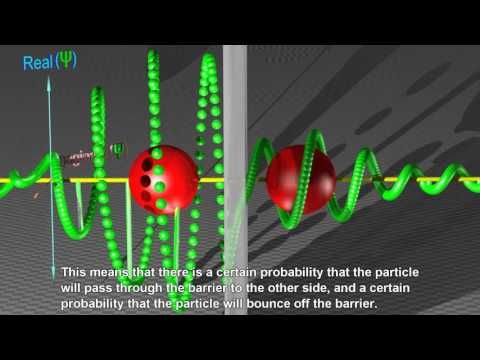

In [5]:
video

# Generalidades

### Recurso 1 : A review and application of the Finite-Difference Time-Domain, Algorithm applied to the Schrodinger Equation. 

### Recurso 2: On the Stability of the FDTD Method for Solving aTime-dependent Schrodinger Equation


La ecuación de Schrodinger, 3D, dependiente del tiempo está dada como 

$j\hbar\cdot\frac{\partial\psi(r,t)}{\partial t}=-\frac{\hbar^2}{2m}\cdot\nabla^2\psi(r,t)+V(r)\psi(r,t) \tag{1}$ 
Donde $\psi(r,t)$ es la funcion de onda en la posicion $r$ y tiempo $t$, $V(r)$ es la funcion de potencial, $m$ la masa de la particula y $\hbar$ es la constante de Planck reducida. 

La funcion de probabilidad esta definida por,
$\rho(x,t)=\psi^*(r,t)\psi(r,t)=|\psi(r,t)|^2 \tag{2}$

La probabilidad total de encontrar una particula $P$ en un determinado volumen es
$P=\int_{V}\rho(r,t)dr \tag{3}$
Debido a esta interpretacion probabilistica, la funcion de onda debe ser normalizada, y equivalente a 1. 
La amplitud del numero de onda $\phi(k)$ esta definida por la transformada de Fourier de $\psi$ para $t=0$

$\phi(k)=\frac{1}{(2\pi)^\frac{3}{2}}\int_{-\infty}^{+\infty}\psi(r,0)e^{-jk\cdot r}dr \tag{4}$
donde $k$ es el vector de onda. En particular,$k$ es importante porque nos da informacion del momento de la particula, que esta dado por,

$ P_{k}=\int_{V_{k}}|\Phi(k)|^{2}dk\tag{5} $

Es de ayuda separar la funcion de onda en componentes real e imaginaria

$\psi(r,t)=\psi_{R}(r,t)+j\psi_{I}(r,t)\tag{6}$

Llevando las componentes real e imaginaria a la ecuacion de Schrodinger produce dos ecuaciones diferenciales de la forma,

$\hbar\cdot\frac{\partial\psi_{R}(r,t)}{\partial t}=-\frac{\hbar^2}{2m}\cdot\nabla^2\psi_{I}(r,t)+V(r)\psi_{I}(r,t) \tag{7}$

$\hbar\cdot\frac{\partial\psi_{I}(r,t)}{\partial t}=-\frac{\hbar^2}{2m}\cdot\nabla^2\psi_{R}(r,t)+V(r)\psi_{R}(r,t) \tag{8}$ 

Será necesario definir una malla que muestre discretizadamente los puntos de la cuadrícula en el espacio y el tiempo
La notacion estandar de FDTD para espaciamiento de cadricula de $\Delta x$,$\Delta y$, $\Delta z$ e intervalos de tiempo $\Delta t$, esta dado por:

$x_{i}=i\Delta x \tag{9}$
$y_{j}=j\Delta y \tag{10}$
$z_{k}=k\Delta z \tag{11}$
$t_{n}=n\Delta n \tag{12}$

se define la notacion de la funcion de onda en los puntos de la malla

$\psi_{R}(x_{i},y_{j},z_{k},t_{n})=\psi_{R}^{n}(i,j,k)\tag{13}$
$\psi_{I}(x_{i},y_{j},z_{k},t_{n})=\psi_{I}^{n}(i,j,k)\tag{14}$

Las derivadas con respecto al tiempo de las componentes reales e imaginarias se aproximan por:

$\frac{\partial\psi_{R}^{n+\frac{1}{2}}(i,j,k)}{\partial t}\approx \frac{\psi_{R}^{n+1}(i,j,k)-\psi_{R}^{n}(i,j,k)}{\Delta t}\tag{15}$

$\frac{\partial\psi_{I}^{n}(i,j,k)}{\partial t}\approx \frac{\psi_{I}^{n+\frac{1}{2}}(i,j,k)-\psi_{I}^{n-\frac{1}{2}}(i,j,k)}{\Delta t}\tag{16}$
Al aplicar una diferencia central en la derivada espacial, se obtiene una buena aproximación de la segunda derivada, dada por
$\frac{\partial^{2}\psi_{R}^{n}(i,j,k)}{\partial x^{2}}\approx \frac{\psi_{R}^{n}(i+1,j,k)-2\psi_{R}^{n}(i,j,k)+\psi_{R}^{n}(i-1,j,k)}{\Delta x^{2}}\tag{17}$

Llevando estas aproximaciones de retorno a las expresiones 7 y 8 y resolviendo para las ecuaciones actualizadas, dan la siguiente formulacion:

$\psi_{R}^{n+1}(i,j,k)=\psi_{R}^{n}(i,j,k)$


$-c_{x}[\psi_{I}^{n+1/2}(i+1,j,k)-2\psi_{I}^{n+1/2}i,j,k)+\psi_{I}^{n+1/2}(i-1,j,k)]
-c_{y}[\psi_{I}^{n+1/2}(i,j+1,k)-2\psi_{I}^{n+1/2}i,j,k)+\psi_{I}^{n+1/2}(i,j-1,k)]
-c_{z}[\psi_{I}^{n+1/2}(i+,j,k+1)-2\psi_{I}^{n+1/2}i,j,k)+\psi_{I}^{n+1/2}(i,j,k-1)]
+c_{v}V(i,j,k)\psi_{I}^{n+1/2}(i+,j,k)\tag{18}$ 

Para la parte real; y


$\psi_{I}^{n+1/2}(i,j,k)=\psi_{I}^{n-1/2}(i,j,k)$
$+c_{x}[\psi_{R}^{n}(i+1,j,k)-2\psi_{R}^{n}i,j,k)+\psi_{R}^{n}(i-1,j,k)]
+c_{y}[\psi_{R}^{n}(i,j+1,k)-2\psi_{R}^{n}i,j,k)+\psi_{R}^{n}(i,j-1,k)]
+c_{z}[\psi_{R}^{n}(i+,j,k+1)-2\psi_{R}^{n}i,j,k)+\psi_{R}^{n}(i,j,k-1)]
-c_{v}V(i,j,k)\psi_{R}^{n}(i+,j,k)\tag{19}$ 

Para la parte imaginaria.

Los coeficientes estan dados por:

$c_{x}=\frac{\hbar\Delta t}{2m\Delta x^{2}}\tag{20}$

$c_{y}=\frac{\hbar\Delta t}{2m\Delta y^{2}}\tag{21}$

$c_{z}=\frac{\hbar\Delta t}{2m\Delta z^{2}}\tag{22}$

$c_{v}=\frac{\Delta t}{\hbar}\tag{23}$

#### Estabilidad

Supongamos que la función potencial es un valor constante tal que 
$\psi(x,t)=\alpha_{1}e^{i(kx-\omega t)}+\alpha_{2}e^{i(kx+\omega t)}\tag{24}$

Donde $k$ es el numero de onda de la particula y $\omega $ es la frecuencia angular. En el caso de una particula libre viajando hacia la derecha donde $\alpha_{1}$=1 y $\alpha_{2}$=0 las componentes reales se simplifican como:  
$\psi_{R}(x,t)=cos(kx-\omega t)\tag{25}$
$\psi_{I}(x,t)=sin(kx-\omega t)\tag{26}$

En terminos de FDTD

$\psi_{R}^{n}(i)=cos(ki\Delta x-\omega n \Delta t)\tag{27}$
$\psi_{I}^{n}(i)=sin(ki\Delta x-\omega n\Delta t)\tag{28}$

por conveniencia se define $A=ki\Delta X-\omega n\Delta t$, de modo que

$\psi_{R}^{n}(i)=cos(A)\tag{29}$
$\psi_{I}^{n}(i)=sin(A)\tag{30}$

Se define $B=k\Delta x$ y $C=\omega\Delta t$ y tenemos:

$\psi_{R}^{n+1}(i)=cos(A-C)\tag{31}$
$\psi_{I}^{n+\frac{1}{2}}(i)=sin(A-\frac{C}{2})\tag{32}$
$\psi_{I}^{n+\frac{1}{2}}(i+1)=sin(A+B-\frac{C}{2})\tag{33}$
$\psi_{I}^{n+\frac{1}{2}}(i-1)=sin(-+B-\frac{C}{2})\tag{34}$

Sustituyendo ecuaciones de la 29 a la 34 en la ecuacion 18, encontramos:
$cos(A-C)=-c_{x}[sin(A+B-\frac{C}{2})-2sin(A-\frac{C}{2})+sin(-+B-\frac{C}{2})]+c_{v}V_{0}sin(A-\frac{C}{2})+cos(A)\tag{35}$

La ecuacion 35 deja ver que para mantener la estabilidad de la simulacion, es necesario elegir las constantes $c_{x}$ y $c_{v}$, de manera que se satisfaga solo para valores reales de $A$,$B$,y $C$. La manera mas simple es eligiendo pasos de tiempo que eviten que el lado derecho, exceda los límites naturales del lado izquierdo.,

Para el tamaño del intervalo de tiempo que satisface la estabilidad se tiene la expresion
$\Delta t \leqslant \frac{\hbar}{\frac{\hbar^{2}}{m\Delta x^{2}}+\frac{V_{0}}{2}}\tag{36}$

In [14]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://www.researchgate.net/publication/267508843_A_Review_and_Application_of_the_Finite-Difference_Time-Domain_Algorithm_Applied_to_the_Schrodinger_Equation">Accede a la bibliografia de esta seccion</a>"""))
display(HTML("""<a href="https://sci-hub.se/https://doi.org/10.1002/num.20082">Accede a la bibliografia de esta seccion</a>"""))

### Simulación

Este código simula el tunelaje cuántico de un electrón a través de una barrera de potencial rectangular. El electrón está representado por una función de onda gaussiana 1D. La ecuación de Schrödinger dependiente del tiempo 1D se resuelve mediante el método de dominio del tiempo de diferencias finitas. El usuario puede ingresar la altura y el ancho de la barrera, y la energía y dispersión de los electrones.

### Comando mágico para graficar

In [7]:
%matplotlib notebook

### Paquetes requeridos

In [8]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

### Definición de variables

In [9]:

# MCDFDT: Método cuántico, diferencias finitas, dominio temporal

class MCDFDT:
    def __init__(self, V0, bw, ke, sig):
       
    # Altura de la barrera de potencial en Joules
        self.V0 = V0 * sc.value('electron volt') 
        
    # Energía cinética del electrón en Joules  
        self.ke = ke * sc.value('electron volt')  
        
    # vector de onda del electron en m^-1
        self.k0 = np.sqrt(self.ke * 2 * sc.m_e / (sc.hbar**2))  
        
    # ancho de la barrera de potencial en m
        self.bw = bw * sc.value('Angstrom star') 
        
    # propagación inicial de la función de onda gaussiana 
        self.sig = sig * sc.value('Angstrom star')  
        
    # tamaño de la cuadrícula, relacionado con el ancho de la barrera y la propagacion de la onda
        self.dx = np.minimum((self.bw / 25.0), (self.sig / 25.0))  
        
    # tamaño del paso del tiempo: de la ecuacion 39
        self.dt = 0.9 * sc.hbar / ((sc.hbar**2/(sc.m_e * self.dx**2)) + (self.V0 / 2.0)) 
        
    # longitud del dominio de simulación  
        length = 40 * np.maximum(self.bw, self.sig) 
        
    # número total de puntos de cuadrícula en el dominio
        self.ll = int(length / self.dx)  
        vel = sc.hbar * self.k0 / sc.m_e
        
    # numero total de pasos de tiempo en la simulación 
        self.tt = int(0.35 * length / vel / self.dt)  
        
    # 1D posición del vector a lo largo de x   
        self.lx = np.linspace(0.0, length, self.ll)  
     

        # BARRERA DE POTENCIAL
        
        self.Vx = np.zeros(self.ll) # se llena de ceros el dominio total de la cuadricula
        
        bwgrid = int(self.bw/(2.0 * self.dx)) #  dentro de la barrera 
        
        bposgrid = int(self.ll/2.0) # region posterior a la barrera
        
        bl = bposgrid - bwgrid  # region a la izquierda de la barrera
        
        br = bposgrid + bwgrid  # region a la derecha de la barrera
        
        self.Vx[bl:br] = self.V0
        
# ARRAYS DE LA FUNCIÓN DE ONDA
        
        # se crean los distintos arrays para ψr,ψi,ψmag llenos de ceros, considerando el tamaño de la cuadricula
        
        self.ψr = np.zeros((self.ll)) 
        self.ψi = np.zeros((self.ll))
        self.ψmag = np.zeros(self.ll)
        
        # posición inicial
        x0 = bl * self.dx - 6 * self.sig                               
        
        # Para facilitar la escritura de la función de onda
        ac = 1.0 / np.sqrt((np.sqrt(np.pi)) * self.sig) 
        
        #Funcion de onda inicial
        ψgauss = ac * np.exp(-(self.lx - x0)**2 / (2.0 * self.sig**2)) 
        
        # componente real
        self.ψr = ψgauss * np.cos(self.k0 * self.lx) 
        
        # componente imaginaria
        self.ψi = ψgauss * np.sin(self.k0 * self.lx) 
        
        #Probabilidad observable (magnitud al cuadrado de la función de onda compleja)
        self.ψmag = self.ψr**2 + self.ψi**2  
        
# FDTD coeficientes requeridos para la estabilidad de la simulacion; ecuaciones 20 y 23

        self.cx = sc.hbar * self.dt / (2.0 * sc.m_e * self.dx**2)
        self.cv = self.dt / sc.hbar
        
#### FDTD Aplicando actualización de funciones: de la ecuacion 35

    def fdtd_update(self):
        self.ψi[1:self.ll - 1] = (self.cx * (self.ψr[2:self.ll] - 2.0 * self.ψr[1:self.ll - 1]
                                    + self.ψr[0:self.ll - 2]) 
                                    - self.cv * self.Vx[1:self.ll - 1] * self.ψr[1:self.ll - 1]
                                    + self.ψi[1:self.ll - 1])
        self.ψr[1:self.ll - 1] = (-self.cx * (self.ψi[2:self.ll] - 2.0 * self.ψi[1:self.ll - 1]
                                    + self.ψi[0:self.ll - 2]) 
                                    + self.cv * self.Vx[1:self.ll - 1] * self.ψi[1:self.ll - 1]
                                    + self.ψr[1:self.ll - 1])
        self.ψmag = self.ψr**2 + self.ψi**2
   

### Definición de Gráficas y simulación

In [10]:
def run_sim(V0_in, bw_in, ke_in, sig_in):
    q1 = MCDFDT(V0_in, bw_in, ke_in, sig_in)

    # Impresion de datos numericos de la simulacion 
    
    print('')
    print('barrera de potencial =', round(q1.V0 / sc.value('electron volt'), 2), 'eV')
    print('ancho de la barrera de potencial =', round(q1.bw / sc.value('Angstrom star'), 2), 'A')
    print('Energía del electrón =', round(q1.ke / sc.value('electron volt'), 2), 'eV')
    print('propagación del electrón =', round(q1.sig / sc.value('Angstrom star'), 2), 'A')
    print('')
    print('tamaño de cuadrícula =', '%.2e' % (q1.dx / sc.value('Angstrom star')), 'A')
    print('pasos de tiempo =', "%.2e" % (q1.dt * 1e15), 'fs')
    
    # Para graficar la funcion de onda inicial(normalizada)
    
    plt.ion()
    fig0 = plt.figure()
    ax0 = fig0.add_subplot(111)
    ax0.set_xlabel('posición ($\AA$)')
    ax0.set_ylabel('$\Psi$')
    ax0.set_title('Función de onda inicial (normalizada)')
    ax0.plot(q1.lx / sc.value('Angstrom star'), q1.ψmag / np.amax(q1.ψmag),"k", label='$|\Psi|^2$')
    ax0.plot(q1.lx / sc.value('Angstrom star'), q1.Vx / np.amax(q1.Vx),"b", label='barrera')
    ax0.plot(q1.lx / sc.value('Angstrom star'), q1.ψi / np.amax(q1.ψi),"r", label='$\Im[\Psi]$', alpha=0.5)
    ax0.plot(q1.lx / sc.value('Angstrom star'), q1.ψr / np.amax(q1.ψr), "g",label='$\Re[\Psi]$', alpha=0.5)
    ax0.legend()
    ax0.grid()
    fig0.show()
    fig0.tight_layout()
    fig0.canvas.draw()
    
    # Para ejecutar simulacion de tunelaje cuantico
    
    input('Presione Enter para iniciar la simulación...')
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_xlabel('posición ($\AA$)')
    ax1.set_ylabel('orden de magnitud')
    fig1.show()
    fig1.canvas.draw()
    for nn in range(0, q1.tt):
        q1.fdtd_update()
        if nn % 50 == 0:
            tstr = 'tiempo = ' + str(round(nn * q1.dt * 1e15, 4)) + ' fs'
            ax1.clear()
            ax1.plot(q1.lx / sc.value('Angstrom star'), q1.ψmag / np.amax(q1.ψmag),"k", label='$|\Psi|^2$')
            ax1.plot(q1.lx / sc.value('Angstrom star'),q1.Vx / np.amax(q1.Vx),"b", label='barrera')
            ax1.legend()
            ax1.grid()
            ax1.set_title(tstr)
            ax1.set_xlabel('posicion ($\AA$)')
            ax1.set_ylabel('magnitud normalizada')
            fig1.canvas.draw()
            
    # Para la funcion de onda final, normalizada
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.set_xlabel('posición ($\AA$)')
    ax2.set_ylabel('$\Psi$')
    ax2.set_title('Función de Onda Final (normalizada)')
    ax2.plot(q1.lx / sc.value('Angstrom star'), q1.ψmag / np.amax(q1.ψmag),"k", label='$|\Psi|^2$')
    ax2.plot(q1.lx / sc.value('Angstrom star'), q1.Vx / np.amax(q1.Vx),"b", label='barrera')
    ax2.plot(q1.lx / sc.value('Angstrom star'), q1.ψi / np.amax(q1.ψi),"r",label='$\Im[\Psi]$', alpha=0.5)
    ax2.plot(q1.lx / sc.value('Angstrom star'), q1.ψr / np.amax(q1.ψr), "g",label='$\Re[\Psi]$', alpha=0.5)
    ax2.legend()
    ax2.grid()
    fig2.show()
    fig2.tight_layout()
    fig2.canvas.draw()

### Input para ejecutar simulación


Ingrese la altura de la barrera en eV (pruebe 600): 600
Ingrese el ancho de la barrera en Angstrom (pruebe 0.25): 0.25
Ingrese la energía del electrón en eV (pruebe 500): 500
Ingrese la propación incial de la función de onda en Angstrom (pruebe 0.8): 0.8

barrera de potencial = 600.0 eV
ancho de la barrera de potencial = 0.25 A
Energía del electrón = 500.0 eV
propagación del electrón = 0.8 A

tamaño de cuadrícula = 1.00e-02 A
pasos de tiempo = 7.74e-06 fs


<IPython.core.display.Javascript object>


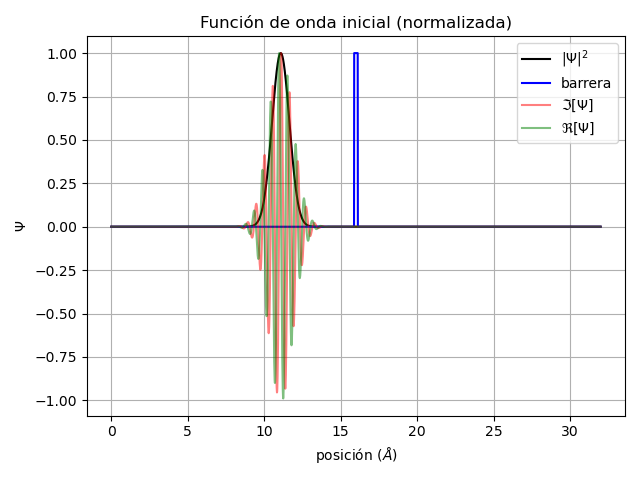

Presione Enter para iniciar la simulación...


<IPython.core.display.Javascript object>


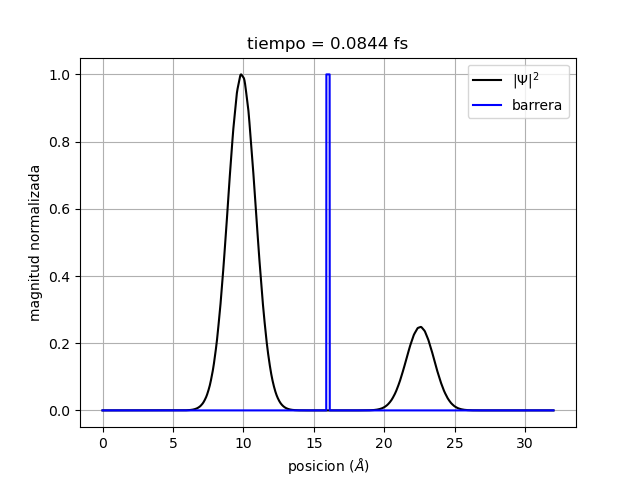

<IPython.core.display.Javascript object>


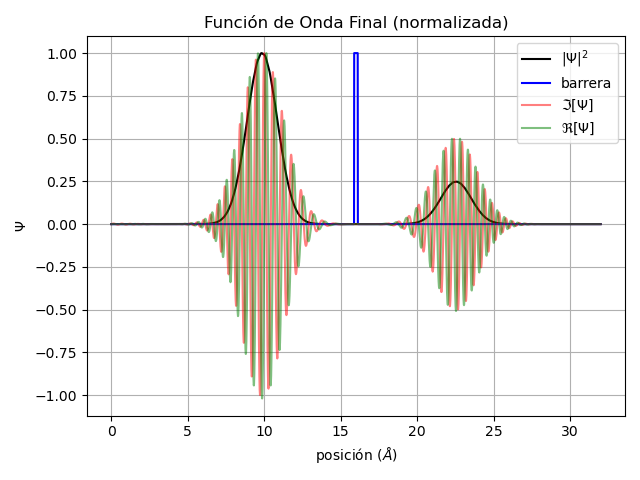

In [15]:
print('')
V0_in = float(input('Ingrese la altura de la barrera en eV (pruebe 600): '))
bw_in = float(input('Ingrese el ancho de la barrera en Angstrom (pruebe 0.25): '))
ke_in = float(input('Ingrese la energía del electrón en eV (pruebe 500): '))
sig_in = float(input('Ingrese la propación incial de la función de onda en Angstrom (pruebe 0.8): '))
run_sim(V0_in, bw_in, ke_in, sig_in)

## Coeficiente de Transmision

De manera similar, la amplitud de la onda reflejada es $|\psi_{ref}(x)|^{2}=|B|^{2}$ y la amplitud de la onda transmitida es $|\psi_{tra}(x)|^{2}=|F|^{2}$ Si queremos saber qué parte de la onda incidente atraviesa la barrera, necesitamos calcular el cuadrado de la amplitud de la onda transmitida. La probabilidad de transmisión o probabilidad de tunelización es la relación entre la intensidad transmitida $( |F|^{2} )$ y la intensidad incidente $( |A|^{2} )$, escrita como:

$T(L,E)=\frac{|\psi_{tra}(x)|^{2}}{|\psi_{in}(x)|^{2}}\tag{37}$

La expresion para el coeficiente de transmision por la barrera es:

$T(L,E)=(\frac{F}{A})^*\frac{F}{A}=\frac{e^{+ikL}}{cosh(\beta L)-i(\gamma/2)sinh(\beta L)}\tag{38}$

o,

$T(L,E)=\frac{1}{cosh^{2}(\beta L)+(\gamma/2)^{2}sinh^{2}(\beta L)}\tag{39}$

donde, 

$(\frac{\gamma}{2})^{2}=\frac{1}{4}(\frac{1-E/U_{0}}{E/U_{0}}+\frac{E/U_{0}}{1-E/U_{0}}-2)\tag{40}$

Para una barrera ancha y alta se puede aproximar

$T(L,E)\approx 16\frac{E}{U_{0}}(1−\frac{E}{U_{0}})e^{−2\beta L}\tag{41}$

donde $\beta$ es:

$\beta=\sqrt{\frac{2m}{\hbar^{2}}(U_{0}-E)}\tag{42}$

$T(L,E)$ es el coeficiente de transmision
$L$ es el ancho de la barrera
$U_0$ es el potencial de la barrera
$E$ es la energia de la particula
$\beta$ es un parametro, numero real. 

In [22]:
display(HTML("""<a href="https://openstax.org/books/f%C3%ADsica-universitaria-volumen-3/pages/7-6-el-efecto-tunel-de-las-particulas-a-traves-de-las-barreras-de-potencial">Accede a la bibliografia de esta seccion</a>"""))

## Verificando coefienciente de transmision 

In [18]:
# Se plantean los datos de la simulacion

me=511e3   # masa del electron en eV/C**2
ħ=0.1973e3 # constante de Planck reducida en eV.nm/C
bw=0.025   # ancho de la barrera en nm
v0=600     # potencial de la barrera en eV
ke=500     # energia cinetica del electron en eV

In [19]:
A=(2*me)/ħ**2 # en 
A

26.254075225889085

In [20]:
# se calcula el parametro β

β=np.sqrt(A*(v0-ke))
β

51.23873068869787

In [23]:
# Se calcula el coeficiente de transmision T redondeado a 4 decimales

T_sim=16*(ke/v0)*(1-(ke/v0))*np.exp(-2*β*bw)
round(T_sim,4)

0.1715

In [124]:
# valor de T encontrado en la literatura

T_teorico=0.1676

In [125]:
# determinando el porcentaje de error del coeficiente T
error=((T_teorico - T_sim)/T_teorico)*100
error

-2.300692138315017

In [127]:
# determinado el coeficiente R
R=1-T_sim
R

0.8285440399761841